In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import train_test_split
from biokit.viz import corrplot

# Settings
%matplotlib inline

ModuleNotFoundError: No module named 'biokit'

In [8]:
# Weergave aanpassen aan eigen voorkeur
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

### Noordzeekanaal

In [9]:
df_nrdzee = pd.read_csv('df_nrdzee.csv')
df_nrdzee.head()

DATUM     TG     X_WGS     Y_WGS      X_RD      Y_RD  %GR_HDH_NVT  \
0  2006-01   13.5  4.763856  52.42339  112608.0  493035.0         89.0   
1  2006-02    6.5  4.763856  52.42339  112608.0  493035.0         80.0   
2  2006-03   34.0  4.763856  52.42339  112608.0  493035.0         58.0   
3  2006-04  110.0  4.763856  52.42339  112608.0  493035.0         70.0   
4  2006-05  149.5  4.763856  52.42339  112608.0  493035.0         69.5   

   %O2_HDH_NVT  BaA_HDH_NVT  CHLFa_HDH_NVT  Cl_HDH_nf  KjN_HDH_N  NH4_HDH_Nnf  \
0        102.0         0.01            2.5    4921.00       0.76        0.410   
1         89.0         0.01            8.0    2901.00       0.96        0.275   
2        100.5         0.02           13.5    2611.00       1.25        0.150   
3         65.0         0.02           19.0    2455.95       1.45        0.070   
4         98.0         0.04           26.0    3167.50       0.63        0.075   

   NO2_HDH_Nnf  NO3_HDH_Nnf  O2_HDH_NVT  P_HDH_NVT  PO4_HDH_Pnf  \
0         0.14        1.710       12.55      0.215       0.2100   
1         0.12        2.705        9.05      0.195       0.1285   
2         0.09        2.210       12.65      0.100       0.0955   
3         0.06        2.285        7.00      0.180       0.0760   
4         0.06        1.205        9.05      0.135       0.0455   

   SALNTT_HDH_NVT  SiO2_HDH_Sinf  WINDSHD_HDH_NVT  ZICHT_HDH_NVT  ZS_HDH_NVT  \
0             9.5          3.720              6.0           11.0         8.0   
1             7.5          3.430              2.5           10.5        12.0   
2             7.3          2.890              3.5           10.5        11.5   
3             7.2          2.175              6.5            8.0        12.0   
4             8.5          0.935              8.0            7.0        14.5   

   pH_HDH_NVT  
0        7.75  
1        7.75  
2        7.80  
3        8.15  
4        8.00

In [10]:
df_nrdzee.shape


(128, 24)

In [11]:
df_nrdzee.index = pd.to_datetime(df_nrdzee.DATUM)

In [42]:
def lagged_corrplot(df, column):
    
    df.index = pd.to_datetime(df.DATUM)
    
    df['CHLFa_HDH_NVT_1'] = df['CHLFa_HDH_NVT'].shift(-1)

    df['CHLFa_HDH_NVT_2'] = df['CHLFa_HDH_NVT'].shift(-2)

    df['CHLFa_HDH_NVT_3'] = df['CHLFa_HDH_NVT'].shift(-3)

    df['CHLFa_HDH_NVT_4'] = df['CHLFa_HDH_NVT'].shift(-4)

    df['CHLFa_HDH_NVT_5'] = df['CHLFa_HDH_NVT'].shift(-5)

    df['CHLFa_HDH_NVT_6'] = df['CHLFa_HDH_NVT'].shift(-6)

    df['CHLFa_HDH_NVT_7'] = df['CHLFa_HDH_NVT'].shift(-7)

    df['CHLFa_HDH_NVT_8'] = df['CHLFa_HDH_NVT'].shift(-8)

    df['CHLFa_HDH_NVT_9'] = df['CHLFa_HDH_NVT'].shift(-9)
    
    #for i in range(1:lags):
        #df.column.shift(i)
        
    df = df[['CHLFa_HDH_NVT', 'CHLFa_HDH_NVT_1', 'CHLFa_HDH_NVT_2', 'CHLFa_HDH_NVT_3', 'CHLFa_HDH_NVT_4', 
                           'CHLFa_HDH_NVT_5', 'CHLFa_HDH_NVT_6', 'CHLFa_HDH_NVT_7', 'CHLFa_HDH_NVT_8', 'CHLFa_HDH_NVT_9', 
                          column]]
    
    names = ['CHLFa_HDH_NVT', 'CHLFa_HDH_NVT_1', 'CHLFa_HDH_NVT_2', 'CHLFa_HDH_NVT_3', 'CHLFa_HDH_NVT_4', 'CHLFa_HDH_NVT_5', 
         'CHLFa_HDH_NVT_6', 'CHLFa_HDH_NVT_7', 'CHLFa_HDH_NVT_8', 'CHLFa_HDH_NVT_9', column]
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), cmap='jet', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,11,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names, rotation=45)
    ax.set_yticklabels(names)
    plt.show()      
    


In [13]:
df_nrdzee['CHLFa_HDH_NVT_1'] = df_nrdzee['CHLFa_HDH_NVT'].shift(1)

df_nrdzee['CHLFa_HDH_NVT_2'] = df_nrdzee['CHLFa_HDH_NVT'].shift(2)

df_nrdzee['CHLFa_HDH_NVT_3'] = df_nrdzee['CHLFa_HDH_NVT'].shift(3)

df_nrdzee['CHLFa_HDH_NVT_4'] = df_nrdzee['CHLFa_HDH_NVT'].shift(4)

df_nrdzee['CHLFa_HDH_NVT_5'] = df_nrdzee['CHLFa_HDH_NVT'].shift(5)

df_nrdzee['CHLFa_HDH_NVT_6'] = df_nrdzee['CHLFa_HDH_NVT'].shift(6)

df_nrdzee['CHLFa_HDH_NVT_7'] = df_nrdzee['CHLFa_HDH_NVT'].shift(7)

df_nrdzee['CHLFa_HDH_NVT_8'] = df_nrdzee['CHLFa_HDH_NVT'].shift(8)

df_nrdzee['CHLFa_HDH_NVT_9'] = df_nrdzee['CHLFa_HDH_NVT'].shift(9)


df_nrdzee_po4 = df_nrdzee[['CHLFa_HDH_NVT', 'CHLFa_HDH_NVT_1', 'CHLFa_HDH_NVT_2', 'CHLFa_HDH_NVT_3', 'CHLFa_HDH_NVT_4', 
                           'CHLFa_HDH_NVT_5', 'CHLFa_HDH_NVT_6', 'CHLFa_HDH_NVT_7', 'CHLFa_HDH_NVT_8', 'CHLFa_HDH_NVT_9', 
                          'PO4_HDH_Pnf']]


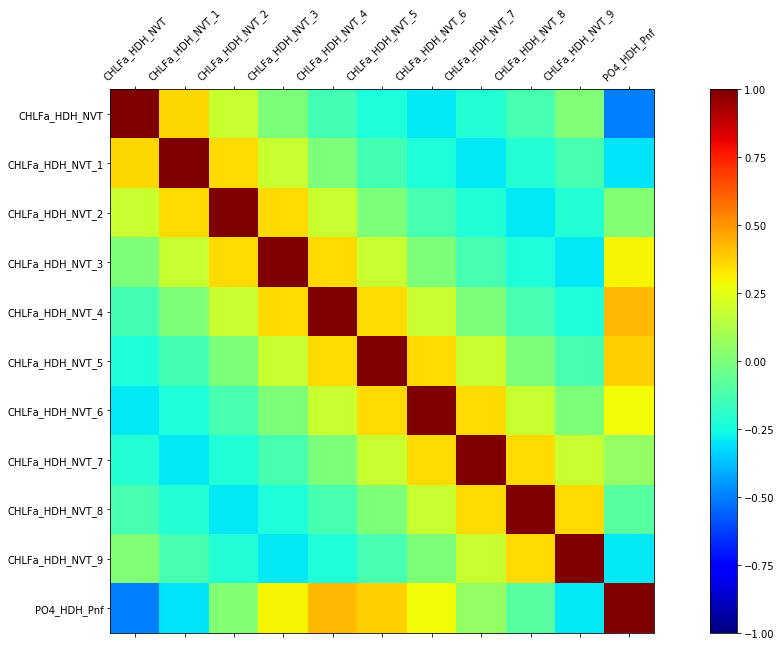

In [14]:
# plot correlation matrix; ax.matshow plots array or matrix
names = ['CHLFa_HDH_NVT', 'CHLFa_HDH_NVT_1', 'CHLFa_HDH_NVT_2', 'CHLFa_HDH_NVT_3', 'CHLFa_HDH_NVT_4', 'CHLFa_HDH_NVT_5', 
         'CHLFa_HDH_NVT_6', 'CHLFa_HDH_NVT_7', 'CHLFa_HDH_NVT_8', 'CHLFa_HDH_NVT_9', 'PO4_HDH_Pnf']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(df_nrdzee_po4.corr(), cmap='jet', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45)
ax.set_yticklabels(names)
plt.show()

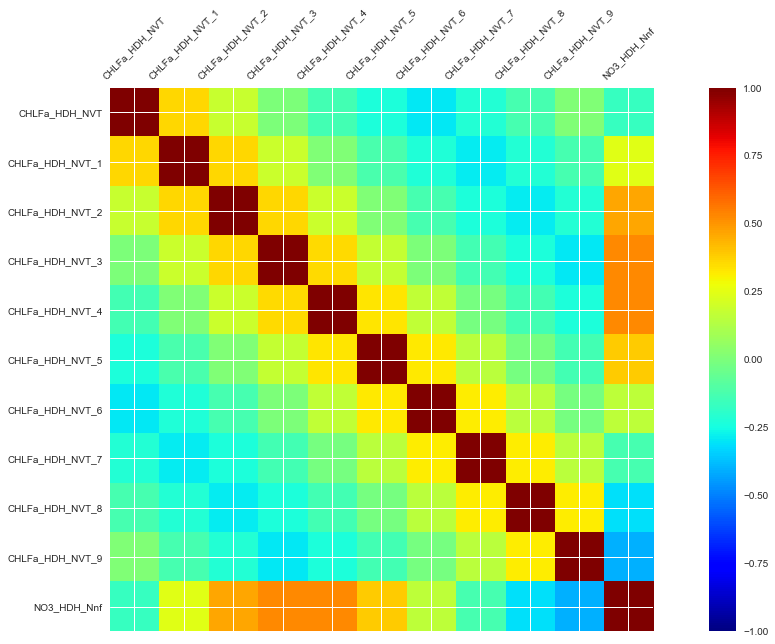

In [43]:
lagged_corrplot(df_nrdzee, 'NO3_HDH_Nnf')

#### Nog doen: andere kleurmap; op 1 as chlfa, op andere predictors; andere gebieden; correlatie per seizoen

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.49883698, 0.48633098, 0.50314551, 0.53698508, 0.58938261,
        0.62846449, 0.68850747, 0.71593856, 0.73069746, 0.70288428,
        0.64029192, 0.56886059, 0.53038768, 0.53551612, 0.54486192,
        0.5717564 , 0.61247112, 0.62496429, 0.65950447, 0.64845086,
        0.63590981, 0.6124581 , 0.54869996, 0.49720369, 0.45275018]),
 <matplotlib.lines.Line2D at 0x2e4c5c21e10>)

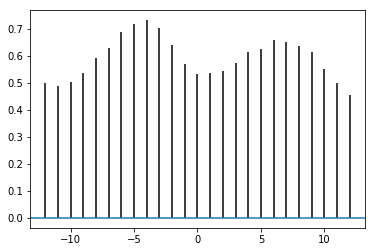

In [7]:
plt.xcorr(df_nrdzee['CHLFa_HDH_NVT'], df_nrdzee['PO4_HDH_Pnf'], maxlags = 12)

In [41]:
df_nrdzee['CHLFa_HDH_NVT'].shift(-8).corr(df_nrdzee['PO4_HDH_Pnf'])

0.3248983475867054

### Kolom met verhouding nitraat en fosfaat

In [26]:
df_nrdzee['NO3/PO4'] = df_nrdzee['NO3_HDH_Nnf'] / df_nrdzee['PO4_HDH_Pnf']

C:\Users\Andries Jan\anacond\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


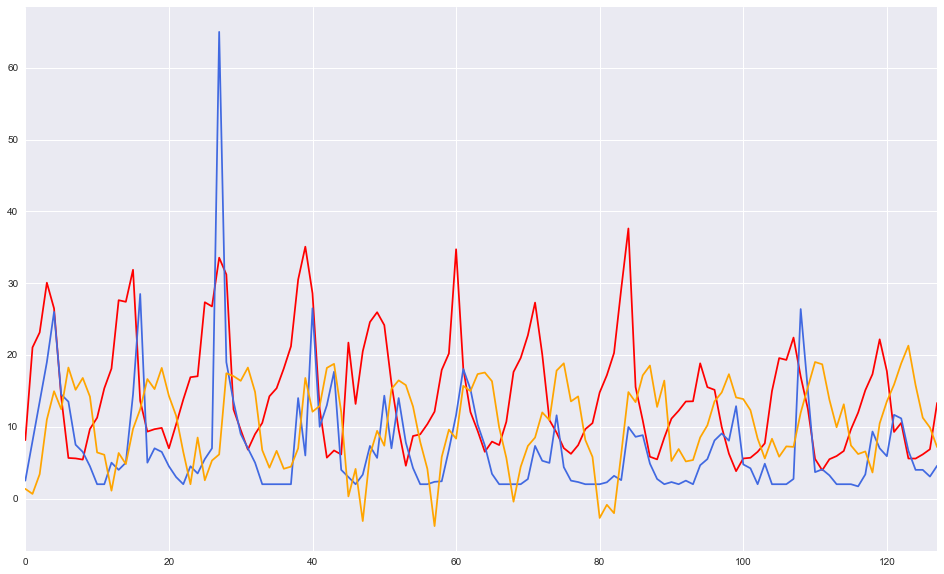

In [36]:
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'aspect':'equal'})
sns.set(rc={"font.size":20,"axes.labelsize":20})

sns.tsplot([df_nrdzee['NO3/PO4']], color='red', ax=ax, legend=True, )
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax, legend=True, )
sns.tsplot(([df_nrdzee.TG / 10]), color='orange', ax=ax, legend=True, )


plt.show()

In [32]:
df_nrdzee['CHLFa_HDH_NVT'].corr(df_nrdzee['NO3/PO4'])

0.32912302367732565

### Maas

In [45]:
df_maas = pd.read_csv('df_maas.csv')
df_maas.head()

DATUM      TG     X_WGS      Y_WGS      X_RD      Y_RD  %DS_HDH_NVT  \
0  2006-01-01   25.80  5.810462  50.957638  184686.4  329869.2         38.0   
1  2006-02-01   41.00  5.838301  51.002172  186608.0  334836.5         42.0   
2  2006-03-01   28.75  5.838301  51.002172  186608.0  334836.5         44.5   
3  2006-04-01   77.75  5.838301  51.002172  186608.0  334836.5         43.0   
4  2006-05-01  154.00  5.838301  51.002172  186608.0  334836.5         47.0   

   %GR_HDH_NVT  %O2_HDH_NVT  BaA_HDH_NVT  BaA_HDH_dg  CHLFa_HDH_NVT  \
0    70.400000       86.220        0.010        0.94           2.00   
1    62.000000       88.375        0.010        0.87           3.50   
2    82.500000       96.250        0.010        1.25           7.00   
3    72.666667       92.950        0.010        1.03           5.75   
4    71.500000       84.775        0.015        0.89          12.75   

   Cl_HDH_nf  KjN_HDH_N  KjN_HDH_Ndg  NH4_HDH_Nnf  NO2_HDH_Nnf  NO3_HDH_Nnf  \
0     50.260     0.6480      13000.0       0.2980        0.056       4.1940   
1     51.300     0.8600      12550.0       0.3900        0.050       4.0700   
2     27.700     1.6000       6200.0       0.1600        0.030       3.8075   
3     27.925     0.7200      12050.0       0.1625        0.045       3.6275   
4     35.125     0.6075       9400.0       0.2700        0.065       3.0750   

   O2_HDH_NVT  P_HDH_NVT  P_HDH_dg  PO4_HDH_Pnf  Ra226_HDH_NVT  \
0       10.88     0.2440      5.00      0.21600            2.0   
1        9.90     0.2575      3.85      0.13975            2.0   
2       11.65     0.1075      1.60      0.05875            2.0   
3       10.25     0.1225      2.55      0.08075            3.0   
4        8.05     0.3725      3.20      0.22175            4.0   

   SALNTT_HDH_NVT  SiO2_HDH_Sinf  WINDSHD_HDH_NVT  ZICHT_HDH_NVT  ZS_HDH_NVT  \
0            0.30         3.5600             2.00          10.80        4.40   
1            0.30         3.5275             1.50           9.00        6.75   
2            0.15         2.8325             1.50           3.00       39.00   
3            0.20         2.5725             1.25           9.25        7.00   
4            0.25         1.0550             1.50           9.25        9.75   

   pH_HDH_NVT  
0       7.840  
1       7.950  
2       8.175  
3       8.025  
4       7.850

In [4]:
df_maas.index = pd.to_datetime(df_maas.index)

In [6]:
df_maas['CHLFa_HDH_NVT_1'] = df_maas['CHLFa_HDH_NVT'].shift(1)

df_maas['CHLFa_HDH_NVT_2'] = df_maas['CHLFa_HDH_NVT'].shift(2)

df_maas['CHLFa_HDH_NVT_3'] = df_maas['CHLFa_HDH_NVT'].shift(3)

df_maas['CHLFa_HDH_NVT_4'] = df_maas['CHLFa_HDH_NVT'].shift(4)

df_maas['CHLFa_HDH_NVT_5'] = df_maas['CHLFa_HDH_NVT'].shift(5)

df_maas['CHLFa_HDH_NVT_6'] = df_maas['CHLFa_HDH_NVT'].shift(6)

df_maas['CHLFa_HDH_NVT_7'] = df_maas['CHLFa_HDH_NVT'].shift(7)

df_maas['CHLFa_HDH_NVT_8'] = df_maas['CHLFa_HDH_NVT'].shift(8)

df_maas['CHLFa_HDH_NVT_9'] = df_maas['CHLFa_HDH_NVT'].shift(9)


df_maas_po4 = df_maas[['CHLFa_HDH_NVT', 'CHLFa_HDH_NVT_1', 'CHLFa_HDH_NVT_2', 'CHLFa_HDH_NVT_3', 'CHLFa_HDH_NVT_4', 
                           'CHLFa_HDH_NVT_5', 'CHLFa_HDH_NVT_6', 'CHLFa_HDH_NVT_7', 'CHLFa_HDH_NVT_8', 'CHLFa_HDH_NVT_9', 
                          'PO4_HDH_Pnf']]


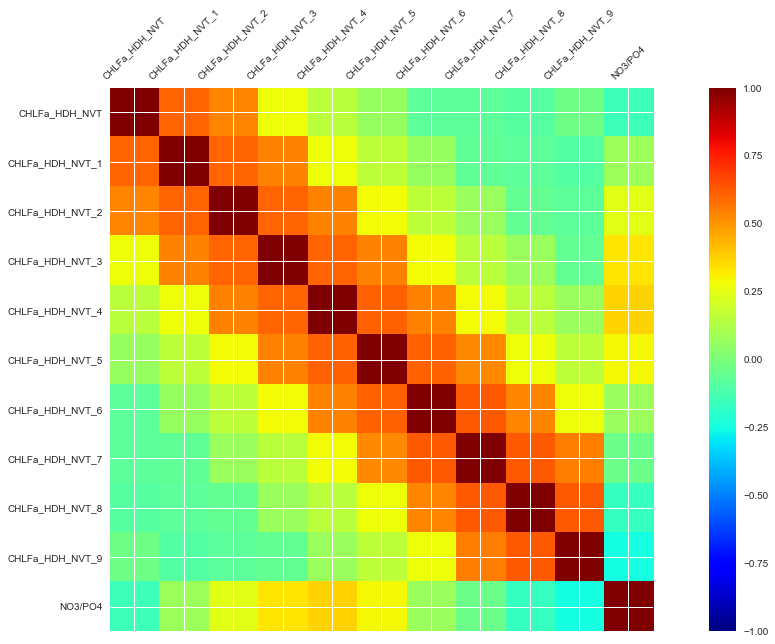

In [51]:
lagged_corrplot(df_maas, 'NO3/PO4')

#### Verhoudingen

In [49]:
df_maas['NO3/PO4'] = df_maas['NO3_HDH_Nnf'] / df_maas['PO4_HDH_Pnf']

In [38]:
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'aspect':'equal'})
sns.set(rc={"font.size":20,"axes.labelsize":20})

sns.tsplot([df_maas['NO3/PO4']], color='red', ax=ax, legend=True, )
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax, legend=True, )
sns.tsplot(([df_maas.TG / 10]), color='orange', ax=ax, legend=True, )


plt.show()

C:\Users\Andries Jan\anacond\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [39]:
df_maas['N/P'] = df_maas['KjN_HDH_N'] / df_maas['P_HDH_NVT']

In [40]:
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'aspect':'equal'})
sns.set(rc={"font.size":20,"axes.labelsize":20})

sns.tsplot([df_maas['N/P']], color='red', ax=ax, legend=True, )
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax, legend=True, )
sns.tsplot(([df_maas.TG / 10]), color='orange', ax=ax, legend=True, )


plt.show()

C:\Users\Andries Jan\anacond\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


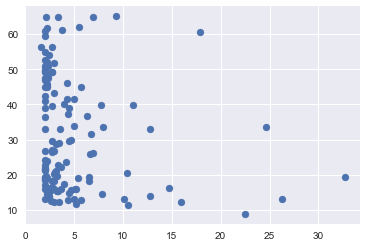

In [41]:
plt.figure()
plt.scatter(df_maas.CHLFa_HDH_NVT, df_maas['NO3/PO4'] )